In [17]:
# -*- coding: utf-8 -*-


import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
#from tensorboard.plugins import projector
tf.__version__
import os
import glob
from PIL import Image
import math

In [8]:
PATH=os.getcwd()
#data_path = PATH + '/every_aerin'
data_path=r"C:\Users\dedunn\Desktop\every_aerin"
#"C:\Users\dedunn\Desktop\every_aerin"
data_dir_list = os.listdir(data_path)

In [15]:
PATH

'C:\\Users\\dedunn\\Desktop'

In [7]:
PATH = os.getcwd()

LOG_DIR = PATH+ '\embedding-logs'
#metadata = os.path.join(LOG_DIR, 'metadata2.tsv')

#%%
#data_path = PATH + '/data'
data_dir_list = os.listdir(data_path)

In [30]:
LOG_DIR

'C:\\Users\\dedunn\\Desktop\\embedding-logs'

In [10]:
img_data=[]
for dataset in data_dir_list:
    data_path=r"C:\Users\dedunn\Desktop\every_aerin\{}".format(dataset)
    #img_list=os.listdir(data_path)
    #print ('Extracting Features of dataset-'+'{}\n'.format(dataset))
    #for img in img_list:
    try:
        input_img=cv2.imread(data_path)
        input_img_resize=cv2.resize(input_img,(224,224))
        img_data.append(input_img_resize)
    except:
         pass
img_data = np.array(img_data)

In [21]:
#%%

feature_vectors = np.loadtxt('feature_vectors_denis_samples.txt')
#print ("feature_vectors_shape:",feature_vectors.shape)
#print ("num of images:",feature_vectors.shape[0])
#print ("size of individual feature vector:",feature_vectors.shape[1])

#num_of_samples=feature_vectors.shape[0]
#num_of_samples_each_class = 100

features = tf.Variable(feature_vectors, name='features')

In [36]:
num_of_samples=920

In [39]:
y = np.ones((num_of_samples,),dtype='int64')

y[0:100]=0
y[100:200]=1
y[200:300]=2
y[300:]=3

names = ['cats','dogs','horses','humans']

##with open(metadata, 'w') as metadata_file:
    #for row in range(210):
        #c = y[row]
        #metadata_file.write('{}\n'.format(c))
#metadata_file = open(os.path.join(LOG_DIR, 'metadata_aileen_classes.tsv'), 'w')
#metadata_file.write('Class\tName\n')
k=100 # num of samples in each class
j=0
#for i in range(210):
#    metadata_file.write('%06d\t%s\n' % (i, names[y[i]]))
for i in range(num_of_samples):
    c = names[y[i]]
    if i%k==0:
        j=j+1
    metadata_file.write('{}\t{}\n'.format(j,c))
    #metadata_file.write('%06d\t%s\n' % (j, c))
metadata_file.close()
       

NameError: name 'metadata_file' is not defined

In [12]:
def create_sprite(data):
    """
    Tile images into sprite image. 
    Add any necessary padding
    """
    
    # For B&W or greyscale images
    if len(data.shape) == 3:
        data = np.tile(data[...,np.newaxis], (1,1,1,3))

    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, 0), (0, 0), (0, 0))
    data = np.pad(data, padding, mode='constant',
            constant_values=0)
    
    # Tile images into sprite
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3, 4))
    # print(data.shape) => (n, image_height, n, image_width, 3)
    
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    # print(data.shape) => (n * image_height, n * image_width, 3) 
    return data

In [6]:
    
# Taken from: https://github.com/tensorflow/tensorflow/issues/6322
#def images_to_sprite(data):
    """Creates the sprite image along with any necessary padding
    Args:
      
    Returns:
      data: Properly shaped HxWx3 image with any necessary padding.
    """
    if len(data.shape) == 3:
        data = np.tile(data[...,np.newaxis], (1,1,1,3))
    data = data.astype(np.float32)
    min = np.min(data.reshape((data.shape[0], -1)), axis=1)
    data = (data.transpose(1,2,3,0) - min).transpose(3,0,1,2)
    max = np.max(data.reshape((data.shape[0], -1)), axis=1)
    data = (data.transpose(1,2,3,0) / max).transpose(3,0,1,2)
    # Inverting the colors seems to look better for MNIST
    #data = 1 - data

    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, 0),
            (0, 0)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant',
            constant_values=0)
    # Tile the individual thumbnails into an image.
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3)
            + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    data = (data * 255).astype(np.uint8)
    return data
#%%

In [14]:


grid = int(math.sqrt(len(img_data))) + 1
image_height = int(8192 / grid)         # tensorboard supports sprite images up to 8192 x 8192
image_width = int(8192 / grid)

big_image = Image.new(
    mode='RGBA',
    size=(image_width * grid, image_height * grid),
    color=(0,0,0,0)) 
for i in range(len(img_data)):

    row     = i // grid  # added integer divide
    col     = i % grid
    img     = Image.fromarray(img_data[i])
    img     = img.resize((image_height, image_width), Image.LANCZOS)
    row_loc = row * image_height
    col_loc = col * image_width

    big_image.paste(img, (col_loc, row_loc)) # NOTE: the order is reverse due to PIL saving
    #print(row_loc, col_loc)

big_image.save('sprite_image.png') # removed transparency

In [ ]:
image_files = glob.glob(os.path.join(IMAGES_DIR, "*.png"))

img_data = []
for img in image_files[:MAX_NUMBER_SAMPLES]:
    input_img = cv2.imread(img)
    input_img_resize = cv2.resize(input_img, IMAGE_SIZE) 
    img_data.append(input_img_resize)
img_data = np.array(img_data)

sprite = create_sprite(img_data)
cv2.imwrite(SPRITES_PATH, sprite)

In [23]:
pwd

'C:\\Users\\dedunn\\Desktop'

In [25]:

sprite = create_sprite(img_data)
cv2.imwrite(os.path.join(LOG_DIR, 'sprite_14_classes.png'), sprite)
#scipy.misc.imsave(os.path.join(LOG_DIR, 'sprite.png'), sprite)

True

In [47]:
#%%
with tf.Session() as sess:

    saver = tf.train.Saver([features])

    sess.run(features.initializer)
    saver.save(sess, os.path.join(LOG_DIR, 'images_22_classes.ckpt'))
    
    config = projector.ProjectorConfig()
    # One can add multiple embeddings.
    embedding = config.embeddings.add()
    embedding.tensor_name = features.name
    # Link this tensor to its metadata file (e.g. labels).
    embedding.metadata_path = os.path.join(LOG_DIR, 'denis_100p_20c.tsv')
    # Comment out if you don't want sprites
    embedding.sprite.image_path =os.path.join(LOG_DIR, 'sprite_14_classes.png')
    for img in img_data:
        embedding.sprite.single_image_dim.extend([img.shape[1], img.shape[1]])
    # Saves a config file that TensorBoard will read during startup.
    projector.visualize_embeddings(tf.summary.FileWriter(LOG_DIR), config)

In [20]:
"C:\Users\dedunn\Desktop\embedding-logs\images_13_classes.ckpt.index"

'C:\\Users\\dedunn\\Desktop'

In [38]:
"C:\Users\dedunn\Desktop\logs\metadata_test_classes.tsv"

array([[205, 235, 235],
       [  0,  25,  27],
       [ 10,  45,  63],
       [ 65, 113, 142],
       [ 41,  79, 101]], dtype=uint8)

In [21]:
from tensorflow.keras.preprocessing.image import array_to_img

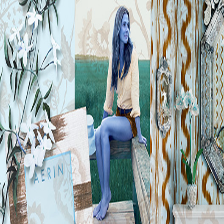

In [22]:
array_to_img(img_data[157])